## Full formulation
### Formulation as described in O'Brien et al. (2013)
$$
\begin{align}
\max_{v,\mu} \ & \mu = c^T v \\
\mathrm{s.t.} \ & Sv = 0 \\
& v_{dilution,ribo} \geq \sum_{i \in Peptide}\left( \frac{l_{p,i}}{c_{ribo}\kappa_{\tau}} v_{translation,i} (\mu+r_0\kappa_{\tau}) \right) \\
& v_{dilution,RNAP} \geq \sum_{i \in TU}\left( \frac{l_{TU,i}}{3 c_{ribo}\kappa_{\tau}} v_{transcription,i} (\mu+r_0\kappa_{\tau}) \right) \\
& v_{dilution,j} \geq \frac{1}{k_{deg,j}} \cdot \mu \cdot v_{degradation,j}, & \forall j \in mRNA \\
& v_{degradation,j} \geq \frac{3 k_{deg,j}}{\kappa_{\tau} c_{mRNA}} \cdot \frac{\mu + \kappa_{\tau} r_0}{\mu} v_{translation,j}  , & \forall j \in mRNA \\
& v_{dilution,j} \geq \frac{1}{\kappa_{\tau} c_{tRNA,j}} (\mu + \kappa_{\tau} r_0)  v_{charging,j} , & \forall j \in tRNA \\
& v_{dilution,j} \geq \mu \sum_{i} \left( \frac{1}{k_{eff,i}} v_{usage,i} \right), & \forall j \in Enzyme \\
& v^{L} \leq v \leq v^{U} \\
& \mu \leq v_{biomass\_dilution} \leq \mu 
\end{align}
$$

where $\mu$ is the growth rate, $v$ is the vector of all fluxes, $l_{p,i}$ is the length of peptide $i$, $l_{TU,i}$ is the length of transcription unit $i$; $c_{ribo}$, $\kappa_{\tau}$, $r_0$, $k_{deg,j}$, $k_{eff,j}$, $c_{mRNA,j}$, $c_{tRNA,j}$ are constants; and $Peptide$, $TU$, $mRNA$, $tRNA$, $Enzyme$ are index sets of $v$ representing peptides, transcription units, mRNA, tRNA, and metabolic enzymes, respectively.

# For ME modeling overview figure

$$
\begin{pmatrix}
& Met  & Trans & Charg & Transcr \\
met1 & -1 & . & . & .\\
met2 & 1 & . & . & .\\ 
enz1 & -\frac{\mu}{k_{eff}} & 1 & . & .\\
mRNA & . &-\frac{\mu + K_{\tau}r_0}{K_{\tau}c_{mRNA}}& . & 1\\
ribo & . &-\frac{l_{p,i}(\mu + K_{\tau}r_0)}{c_{ribo}K_{\tau}}& . & .\\
tRNA\_char & . & -1 & 1 & .\\
tRNA & . & . & -(1 + \frac{\mu + K_{\tau}r_0}{K_{\tau}c_{tRNA,j}}) & .\\
aa & . & . & -(1 + \frac{\mu + K_{\tau}r_0}{K_{\tau}c_{tRNA,j}}) & . \\
synth & . & . & -\frac{\mu}{k_{eff}} & . \\
nuc & . & . & . & -1\\
RNAP & . & . & . & - \frac{l_{TU,i}(\mu + K_{\tau}r_0)}{3c_{ribo}K_{\tau}}
\end{pmatrix}
$$

$$
\begin{align*}
v_{degradation,j} \cdot \mu &\geq \frac{3 k_{deg,j} (\mu + \kappa_\tau r_0)}{\kappa_\tau c_{mRNA}} v_{translation,j}
\end{align*}
$$

$$
\begin{align*}
mRNA &: v_{transc} - v_{degradation} - v_{dilution} - v_{translation} = 0 \\
& v_{transc} - v_{degradation} - v_{dilution + translation}= 0 \\
Deg-constraint &: v_{degradation,j} \geq \frac{3 k_{deg,j}}{\kappa_{\tau} c_{mRNA}} \cdot \frac{\mu + \kappa_{\tau} r_0}{\mu} v_{translation,j} \\
& v_{degradation,j} \cdot \mu \geq \frac{3 k_{deg,j} (\mu + \kappa_\tau r_0)}{\kappa_\tau c_{mRNA}} v_{translation,j}
\end{align*}
$$

$$
\begin{align*}
v_{degradation,j} &\geq \frac{\mu}{k_{eff,deg}} v_{translation,j} \\
k_{mRNA,deg} &= \frac{\mu \kappa_{\tau} c_{mRNA,j}}{3 k_{deg,j}(1 + \kappa_{\tau} r_0/\mu)} \\
k_{mRNA,cat} &= \frac{c_{mRNA} \kappa_\tau \mu}{\mu + r_0 \kappa_\tau} \\
v_{dil,mRNA} &\geq \frac{\mu}{k_{mRNA,cat}} v_{translation,j} \\
v_{deg,mRNA} &\geq \frac{k_{deg,mRNA}}{k_{mRNA,cat}} v_{translation,j} \\
\end{align*}
$$

$$
\begin{align*}
\frac{k_{mRNA,deg}}{k_{mRNA,cat}} &= \frac{\mu + r_0 \kappa_\tau}{3k_{deg,j}(1+\kappa_\tau r_0/\mu)}
\end{align*}
$$

$$
\begin{align*}
\frac{k_{mRNA,deg}}{k_{mRNA,cat}} &= \frac{\mu + r_0 \kappa_\tau}{3k_{deg,j}(1+\kappa_\tau r_0/\mu)}
\end{align*}
$$

### Constants
$$
\begin{align*}
\frac{R}{P} &= \frac{\mu + \kappa_{\tau} r_0}{\kappa_{\tau}}\\
c_{ribo} &= \frac{m_{rr,i}}{m_{aa} f_{rRNA}} =  \frac{\sim 1700 \mathrm{\ kDa}}{0.109 \mathrm{\ kDa} \cdot 0.86} \approx 18135 \\
\kappa_{\tau} &= 4.5 \mathrm{\ h}^{-1} \\
r_0 &= 0.087 \\
c_{tRNA,j} &= \frac{m_{tRNA,j}}{m_{aa} f_{tRNA}} = \frac{\sim 25 \mathrm{\ kDa}}{0.109 \mathrm{\ kDa} \cdot 0.12} \approx 1911 \\
k_{eff,tRNA charging} &= \frac{\kappa_\tau c_{tRNA,j}\mu}{\mu + \kappa_\tau r_0} = \frac{P m_{tRNA}\mu}{Rf_{tRNA}m_{aa} } \\
\end{align*}
$$

In [2]:
kt = 4.5
r0 = 0.087
c_ribo = 1700/0.109/0.86
m_tRNA = 25    # kDa
m_aa = 0.109   # kDa
k_deg = 1.0/5 * 60.0  # 1/5 1/min 60 min/h # h-1
f_tRNA = 0.12
c_tRNA = m_tRNA/(m_aa * f_tRNA)
# tRNA charging keff
keff_tRNA_charging = kt * c_tRNA
# Translation keff
keff_transl_per_length = c_ribo*kt
print 'c_tRNA * kt = ',c_tRNA * kt
print c_ribo
print c_tRNA
print keff_transl_per_length
print keff_tRNA_charging
print k_deg

c_tRNA * kt =  8600.91743119
18135.2677619
1911.31498471
81608.7049285
8600.91743119
12.0


In [20]:
m_nt = 324./1000.
f_mRNA = .02
c_mRNA = m_nt/(f_mRNA*m_aa) 
print c_mRNA * kt / 3600.

0.185779816514


In [30]:
r0 * kt

0.39149999999999996

In [12]:
c_tRNA * kt/3600.

2.38914373088685

In [32]:
c_tRNA

1911.31498470948

In [4]:
f = lambda x: ((x / kt) + r0)

In [7]:
f(0.924162)

0.29236933333333337

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':


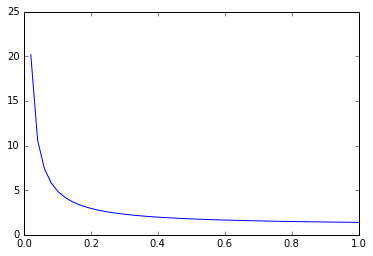

In [14]:
%matplotlib inline
x = linspace(0, 1)
plot(x, f(x))

In [1]:
mu = 1.0
mu * 22.7 / (mu + 0.391)

16.319194823867722

### Generalized formulation
$$
\begin{align}
\max_{v,\mu} \ & \mu = c^T v = v_{j:j=growth}\\
\mathrm{s.t.} \ & S v = 0 \\
& \mu \sum_{j=1}^{n} a_{ij} v_j + \sum_{j=1}^{n} b_{ij} v_j \leq 0, & i=1,\dots,q \\
& v^L \leq v \leq v^U
\end{align}
$$
where $q$ is the number of bilinear constraints, and $a_{ij}$ and $b_{ij}$ are constants.

### Piecewise McCormick relaxation formulation of BLP
$$
\begin{align}
\min_{x,w,y} \ & c^T x \\
\mathrm{s.t.} \ & Ax = b \\
& w_\textit{ij} \geq \sum_n(\hat{x}_\textit{ijn} \cdot x^L_\textit{jn} + x^L_i \cdot \hat{x}_\textit{jn} - x^L_i \cdot x^L_\textit{jn} \cdot y_\textit{jn})\\
& w_\textit{ij} \geq \sum_n(\hat{x}_\textit{ijn} \cdot x^U_\textit{jn} + x^U_i \cdot \hat{x}_\textit{jn} - x^U_i \cdot x^U_\textit{jn} \cdot y_\textit{jn}) \\
& w_\textit{ij} \leq \sum_n(\hat{x}_\textit{ijn} \cdot x^L_\textit{jn} + x^U_i \cdot \hat{x}_\textit{jn} - x^U_i \cdot x^L_\textit{jn} \cdot y_\textit{jn}) \\
& w_\textit{ij} \leq \sum_n(\hat{x}_\textit{ijn} \cdot x^U_\textit{jn} + x^L_i \cdot \hat{x}_\textit{jn} - x^L_i \cdot x^U_\textit{jn} \cdot y_\textit{jn}) \\
& x_i = \sum_n \hat{x}_\textit{ijn} \\
& x_j = \sum_n \hat{x}_\textit{jn} \\
& x_i^L y_\textit{jn} \leq \hat{x}_\textit{ijn} \leq x_i^U y_\textit{jn} \\
& x_\textit{jn}^L y_\textit{jn} \leq \hat{x}_\textit{jn} \leq x_\textit{jn}^U y_\textit{jn} \\
& \sum_n y_\textit{jn} = 1 \\
& x^L_\textit{jn} = x^L_j+ \frac{(x^U_j-x^L_j) \cdot (n-1)}{N} \\
& x^L_\textit{jn} = x^L_j+ \frac{(x^U_j-x^L_j) \cdot n}{N} \\
\end{align}
$$

### Piecewise McCormick relaxation formulation of tiny-ME
$$
\begin{align}
\max_{v,\mu,\hat{v},\hat{\mu},w,y} \ & \mu = c^T v \\
\mathrm{s.t.} \ & Sv = 0 \\
& w_\textit{i} \geq \sum_n(\hat{v}_\textit{in} \cdot \mu^L_\textit{n} + v^L_i \cdot \hat{\mu}_n - v^L_i \cdot \mu^L_\textit{n} \cdot y_\textit{n})\\
& w_\textit{i} \geq \sum_n(\hat{v}_\textit{in} \cdot \mu^U_\textit{n} + v^U_i \cdot \hat{\mu}_n - v^U_i \cdot \mu^U_\textit{n} \cdot y_\textit{n}) \\
& w_\textit{i} \leq \sum_n(\hat{v}_\textit{in} \cdot \mu^L_\textit{n} + v^U_i \cdot \hat{\mu}_n - v^U_i \cdot \mu^L_\textit{n} \cdot y_\textit{n}) \\
& w_\textit{i} \leq \sum_n(\hat{v}_\textit{in} \cdot \mu^U_\textit{n} + v^L_i \cdot \hat{\mu}_n - v^L_i \cdot \mu^U_\textit{n} \cdot y_\textit{n}) \\
& v^L_i y_n \leq \hat{v}_\textit{in} \leq v^U_i y_n \\
& \mu^L_n y_n \leq \hat{\mu}_n \leq \mu^U_n y_n \\
& v_i = \sum_{n}\hat{v}_\textit{in} \\
& \mu = \sum_{n}\hat{\mu}_n \\
& \sum_n y_\textit{n} = 1 \\
& \mu^L_\textit{n} = \mu^L+ \frac{(\mu^U-\mu^L) \cdot (n-1)}{N} \\
& \mu^L_\textit{n} = \mu^L+ \frac{(\mu^U-\mu^L) \cdot n}{N} \\
\end{align}
$$

### Radix-based discretization of BLP
$$
\begin{align}
\max_{x} \ & c^T x \\
\mathrm{s.t.} \ & Ax = b \\
& \sum_i \sum_j a_\textit{ij} x_i x_j = 0 \\
\end{align}
$$

can be approximate with specified precision by

$$
\begin{align}
\max_{x,w,\hat{x},z} \ & c^T x \\
\mathrm{s.t.} \ & Ax = b \\
& \sum_i \sum_j a_\textit{ij} w_\textit{ij} = 0 \\
& w_\textit{ij} = \sum_{l=p}^P \sum_{k=0}^9 10^l \cdot k \cdot \hat{x}_\textit{ijkl} \\
& x_j = \sum_{l=p}^P \sum_{k=0}^9 10^l \cdot k \cdot z_\textit{jkl} \\
& x_i^L \cdot z_\textit{jkl} \leq \hat{x}_\textit{ijkl} \leq x_i^U \cdot z_\textit{jkl} \\
& \sum_{k=0}^9 \hat{x}_\textit{ijkl} = x_i \\
& \sum_{k=0}^9 z_\textit{jkl} = 1 \\
& z_\textit{jkl} \in \{0,1\}
\end{align}
$$

### Radix-based discretization of tiny-ME
$$
\begin{align}
\max_{v,\mu,w,\hat{v},z} \ & \mu = c^T v\\
\mathrm{s.t.} \ & S v = 0 \\
& \sum_j a_\textit{i,j} w_j + \sum_j b_\textit{i,j} v_j = 0 \\
& w_j = \sum_{l=p}^P \sum_{k=0}^9 10^l \cdot k \cdot \hat{v}_\textit{jkl} \\
& \mu = \sum_{l=p}^P \sum_{k=0}^9 10^l \cdot k \cdot z_\textit{kl} \\
& v_j^L \cdot z_\textit{kl} \leq \hat{v}_\textit{jkl} \leq v_j^U \cdot z_\textit{kl} \\
& \sum_{k=0}^9 \hat{v}_\textit{jkl} = v_j, & \forall l \in L, \forall j \in Coupling \\
& \sum_{k=0}^9 z_\textit{kl} = 1, & \forall l \in L \\
& z_\textit{kl} \in \{0,1\}
\end{align}
$$

#### Additional tightening via McCormick envelopes
$$
\begin{align}
& w_\textit{j} \geq v_\textit{j} \cdot \mu^L + v^L_j \cdot \mu - v^L_j \cdot \mu^L \\
& w_\textit{j} \geq v_\textit{j} \cdot \mu^U + v^U_j \cdot \mu - v^U_j \cdot \mu^U \\
& w_\textit{j} \leq v_\textit{j} \cdot \mu^L + v^U_j \cdot \mu - v^U_j \cdot \mu^L \\
& w_\textit{j} \leq v_\textit{j} \cdot \mu^U + v^L_j \cdot \mu - v^L_j \cdot \mu^U \\
\end{align}
$$

### Additional nonlinear constraints in GSM ME
$$
20 \cdot \textrm{average_aa_mw} \cdot \textrm{proportion_of_rna_that_is_mrna}
$$

In [2]:
from sympy import init_printing, symbols, latex, simplify
from sympy.printing.mathml import print_mathml
from sympy.parsing.sympy_parser import parse_expr
expr = "1058.0*average_aa_mw*proportion_of_rna_that_is_rrna*(0.222222222222222*growth_rate_in_per_hour + 1.087)*(0.03844203*growth_rate_in_per_hour**3.90364139/(growth_rate_in_per_hour**3.90364139 + 0.11685874) - 6.53086343855605e-9*(5731824.61240473*2**(0.231049057876158*growth_rate_in_per_hour)*(-0.45612411*2**(0.231049057876158*growth_rate_in_per_hour) + 3.9*2**(0.231049060186648*growth_rate_in_per_hour)) + 2614423.4000092*2**(0.462098115752316*growth_rate_in_per_hour))/(0.052012300930823*2**(0.462098115752316*growth_rate_in_per_hour)*(-1.43295615310118*2**(0.231049057876158*growth_rate_in_per_hour) + 12.2522113490002*2**(0.231049060186648*growth_rate_in_per_hour)) + 0.0372656733278866*2**(0.693147173628473*growth_rate_in_per_hour)) + 0.91768589 - (0.03844203*growth_rate_in_per_hour**3.90364139/(growth_rate_in_per_hour**3.90364139 + 0.11685874) - 6.53086343855605e-9*(5731824.61240473*2**(0.231049057876158*growth_rate_in_per_hour)*(-0.45612411*2**(0.231049057876158*growth_rate_in_per_hour) + 3.9*2**(0.231049060186648*growth_rate_in_per_hour)) + 2614423.4000092*2**(0.462098115752316*growth_rate_in_per_hour))/(0.052012300930823*2**(0.462098115752316*growth_rate_in_per_hour)*(-1.43295615310118*2**(0.231049057876158*growth_rate_in_per_hour) + 12.2522113490002*2**(0.231049060186648*growth_rate_in_per_hour)) + 0.0372656733278866*2**(0.693147173628473*growth_rate_in_per_hour)) + 0.91768589)/(0.222222222222222*growth_rate_in_per_hour + 1.087))/(mass_rrna_per_ribosome*(0.03844203*growth_rate_in_per_hour**3.90364139/(growth_rate_in_per_hour**3.90364139 + 0.11685874) - 6.53086343855605e-9*(5731824.61240473*2**(0.231049057876158*growth_rate_in_per_hour)*(-0.45612411*2**(0.231049057876158*growth_rate_in_per_hour) + 3.9*2**(0.231049060186648*growth_rate_in_per_hour)) + 2614423.4000092*2**(0.462098115752316*growth_rate_in_per_hour))/(0.052012300930823*2**(0.462098115752316*growth_rate_in_per_hour)*(-1.43295615310118*2**(0.231049057876158*growth_rate_in_per_hour) + 12.2522113490002*2**(0.231049060186648*growth_rate_in_per_hour)) + 0.0372656733278866*2**(0.693147173628473*growth_rate_in_per_hour)) + 0.91768589))"
#expr = "(22039.3155555555*growth_rate_in_per_hour + 107805.31204)*(0.03844203*growth_rate_in_per_hour**3.90364139/(growth_rate_in_per_hour**3.90364139 + 0.11685874) - (0.0374337637973698*2**(0.231049057876158*growth_rate_in_per_hour)*(-0.45612411*2**(0.231049057876158*growth_rate_in_per_hour) + 3.9*2**(0.231049060186648*growth_rate_in_per_hour)) + 0.0170744421960255*2**(0.462098115752316*growth_rate_in_per_hour))/(0.052012300930823*2**(0.462098115752316*growth_rate_in_per_hour)*(-1.43295615310118*2**(0.231049057876158*growth_rate_in_per_hour) + 12.2522113490002*2**(0.231049060186648*growth_rate_in_per_hour)) + 0.0372656733278866*2**(0.693147173628473*growth_rate_in_per_hour)) + 0.91768589 - (0.03844203*growth_rate_in_per_hour**3.90364139/(growth_rate_in_per_hour**3.90364139 + 0.11685874) - (0.0374337637973698*2**(0.231049057876158*growth_rate_in_per_hour)*(-0.45612411*2**(0.231049057876158*growth_rate_in_per_hour) + 3.9*2**(0.231049060186648*growth_rate_in_per_hour)) + 0.0170744421960255*2**(0.462098115752316*growth_rate_in_per_hour))/(0.052012300930823*2**(0.462098115752316*growth_rate_in_per_hour)*(-1.43295615310118*2**(0.231049057876158*growth_rate_in_per_hour) + 12.2522113490002*2**(0.231049060186648*growth_rate_in_per_hour)) + 0.0372656733278866*2**(0.693147173628473*growth_rate_in_per_hour)) + 0.91768589)/(0.222222222222222*growth_rate_in_per_hour + 1.087))/(65351.451*growth_rate_in_per_hour**3.90364139/(growth_rate_in_per_hour**3.90364139 + 0.11685874) - 1700000.0*(0.0374337637973698*2**(0.231049057876158*growth_rate_in_per_hour)*(-0.45612411*2**(0.231049057876158*growth_rate_in_per_hour) + 3.9*2**(0.231049060186648*growth_rate_in_per_hour)) + 0.0170744421960255*2**(0.462098115752316*growth_rate_in_per_hour))/(0.052012300930823*2**(0.462098115752316*growth_rate_in_per_hour)*(-1.43295615310118*2**(0.231049057876158*growth_rate_in_per_hour) + 12.2522113490002*2**(0.231049060186648*growth_rate_in_per_hour)) + 0.0372656733278866*2**(0.693147173628473*growth_rate_in_per_hour)) + 1560066.013)"
expr = "0.0184129956861297*growth_rate_in_per_hour*unmodeled_protein_proportion_of_proteome*(0.03844203*growth_rate_in_per_hour**3.90364139/(growth_rate_in_per_hour**3.90364139 + 0.11685874) - 6.53086343855605e-9*(5731824.61240473*2**(0.231049057876158*growth_rate_in_per_hour)*(-0.45612411*2**(0.231049057876158*growth_rate_in_per_hour) + 3.9*2**(0.231049060186648*growth_rate_in_per_hour)) + 2614423.4000092*2**(0.462098115752316*growth_rate_in_per_hour))/(0.052012300930823*2**(0.462098115752316*growth_rate_in_per_hour)*(-1.43295615310118*2**(0.231049057876158*growth_rate_in_per_hour) + 12.2522113490002*2**(0.231049060186648*growth_rate_in_per_hour)) + 0.0372656733278866*2**(0.693147173628473*growth_rate_in_per_hour)) + 0.91768589)/(0.222222222222222*growth_rate_in_per_hour + 1.087)"
#init_printing()   # Doesn't work...
expr = expr.replace('growth_rate_in_per_hour','mu')

sexpr = parse_expr(expr)

#sexpr = simplify(sexpr)

l = latex(sexpr)
print l
#print_mathml(sexpr)

import sympy as sp
sp.N(sexpr,subs={'mu' : 0.1, 'unmodeled_protein_proportion_of_proteome' : 0.45})


0.0184129956861297 \frac{\mu unmodeled_{protein proportion of proteome} \left(0.03844203 \frac{\mu^{3.90364139}}{\mu^{3.90364139} + 0.11685874} - \frac{0.0374337637973698 \times 2^{0.231049057876158 \mu} \left(- 0.45612411 \times 2^{0.231049057876158 \mu} + 3.9 \times 2^{0.231049060186648 \mu}\right) + 0.0170744421960255 \times 2^{0.462098115752316 \mu}}{0.052012300930823 \times 2^{0.462098115752316 \mu} \left(- 1.43295615310118 \times 2^{0.231049057876158 \mu} + 12.2522113490002 \times 2^{0.231049060186648 \mu}\right) + 0.0372656733278866 \times 2^{0.693147173628473 \mu}} + 0.91768589\right)}{0.222222222222222 \mu + 1.087}


0.000506667522842899

$$
0.0184129956861297 \frac{\mu unmodeled_{protein proportion of proteome} \left(0.03844203 \frac{\mu^{3.90364139}}{\mu^{3.90364139} + 0.11685874} - \frac{0.0374337637973698 \times 2^{0.231049057876158 \mu} \left(- 0.45612411 \times 2^{0.231049057876158 \mu} + 3.9 \times 2^{0.231049060186648 \mu}\right) + 0.0170744421960255 \times 2^{0.462098115752316 \mu}}{0.052012300930823 \times 2^{0.462098115752316 \mu} \left(- 1.43295615310118 \times 2^{0.231049057876158 \mu} + 12.2522113490002 \times 2^{0.231049060186648 \mu}\right) + 0.0372656733278866 \times 2^{0.693147173628473 \mu}} + 0.91768589\right)}{0.222222222222222 \mu + 1.087}
$$

In [3]:
r0 = 0.087
kt = 4.5
kdeg = 1/5 * 60
fmRNA = 0.02
mnt = 324
maa = 109
cmRNA = mnt / fmRNA / maa

print 1.087/0.0292550617283951
print 0.22222222/0.00598079561042524


37.1559633028
37.1559629312


In [4]:
'CPLX0-222_TU_p_4325087_4328261'

'CPLX0-222_TU_p_4325087_4328261'

### Minimal proteome identification procedure
#### Version A: fewer differentially expressed genes (DEGs) than non-DEGs
$$
\begin{align}
\min_{v,\ y} \ & {\sum_{i} y_i} \\
\mathrm{s.t.} \ & Sv=0 \\
& v_{biomass} \geq \mu^{min} \\
& v_j^L \leq v_j \leq v_j^U, & \forall j \in NDEGs \\
& y_j v_j^L \leq v_j \leq y_j v_j^U, & \forall j \in DEGs\\ 
\end{align}
$$
where the sets $DEGs$ and $NDEGs$ are determined using meta-analysis of differential gene expression data sets across strains and/or conditions. Also, $\mu^{min}$ is the minimum required growth rate for the cell to be considered viable.